In [1]:
#libraries import

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\Anii\OneDrive\Desktop\MINE\Capstone\diabetes.csv")

In [4]:
#overview of dataset and missing values

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()
# no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
# Checking for number of zeros in each column
print("BloodPressure:", df[df['BloodPressure'] == 0].shape[0])
print("Glucose:", df[df['Glucose'] == 0].shape[0])
print("SkinThickness:", df[df['SkinThickness'] == 0].shape[0])
print("Insulin:", df[df['Insulin'] == 0].shape[0])
print("BMI:", df[df['BMI'] == 0].shape[0])

BloodPressure: 35
Glucose: 5
SkinThickness: 227
Insulin: 374
BMI: 11


In [10]:
#Visualization

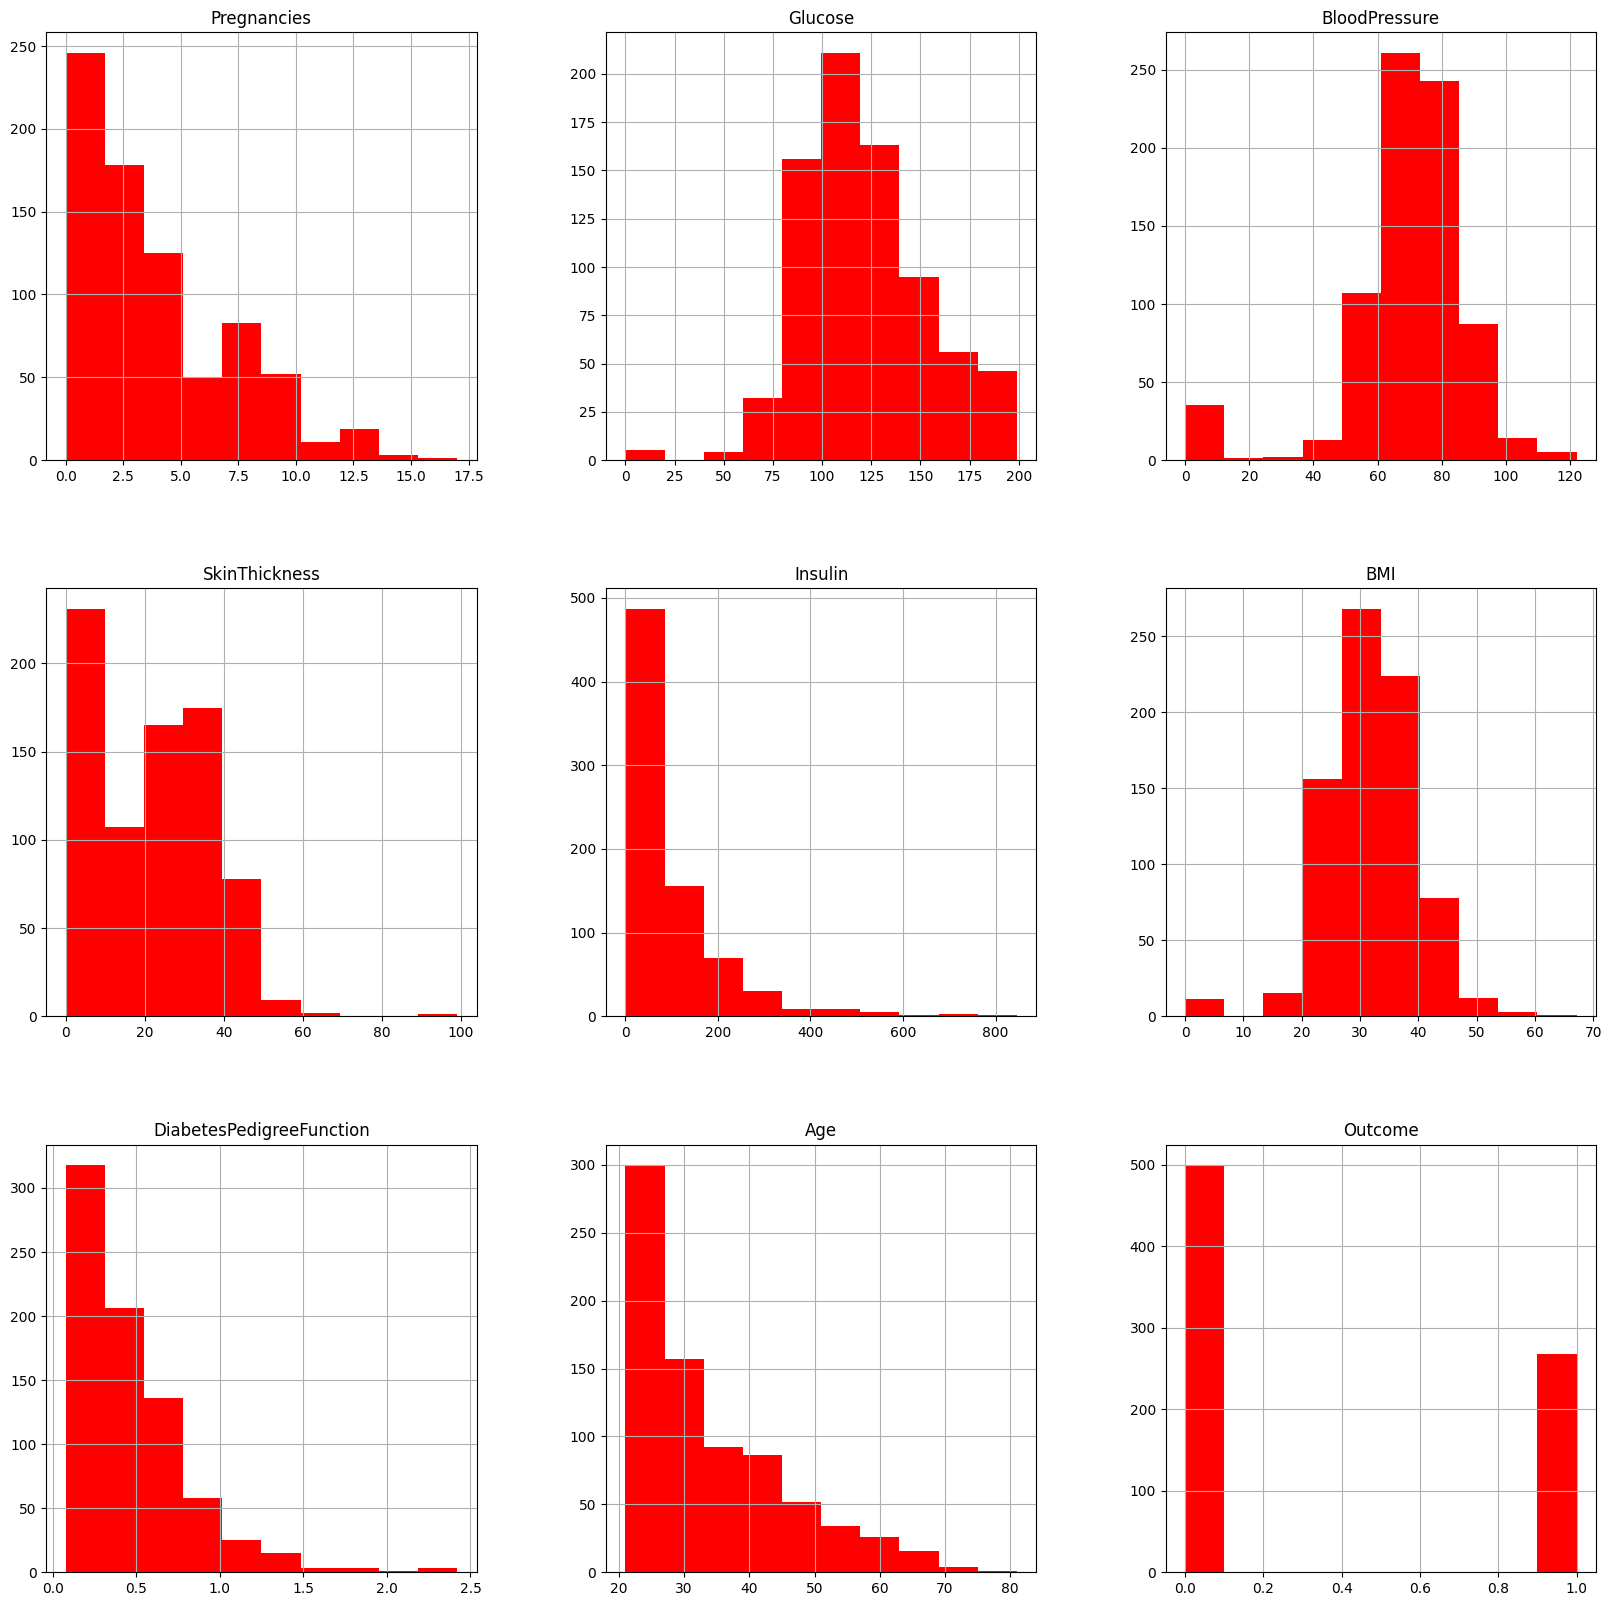

In [11]:
df.hist(color = 'red' , figsize = (20,20));

In [12]:
#zero values handling

In [13]:
""" Some of the columns have a skewed distribution, so the mean is more affected by outliers than 
the median. Glucose and Blood Pressure have normal distributions hence we replace 0 values in 
those columns by mean value. SkinThickness, Insulin,BMI have skewed distributions hence median 
is a better choice as it is less affected by outliers. """

' Some of the columns have a skewed distribution, so the mean is more affected by outliers than \nthe median. Glucose and Blood Pressure have normal distributions hence we replace 0 values in \nthose columns by mean value. SkinThickness, Insulin,BMI have skewed distributions hence median \nis a better choice as it is less affected by outliers. '

In [14]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

In [15]:
df.shape

(768, 9)

In [16]:
#class distribution of outcomes

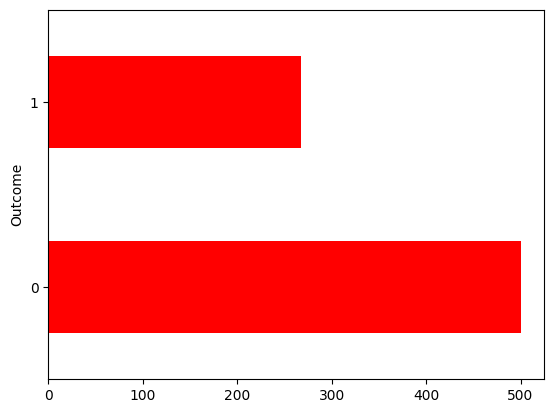

In [17]:
df['Outcome'].value_counts().plot(kind="barh" , color = 'red');

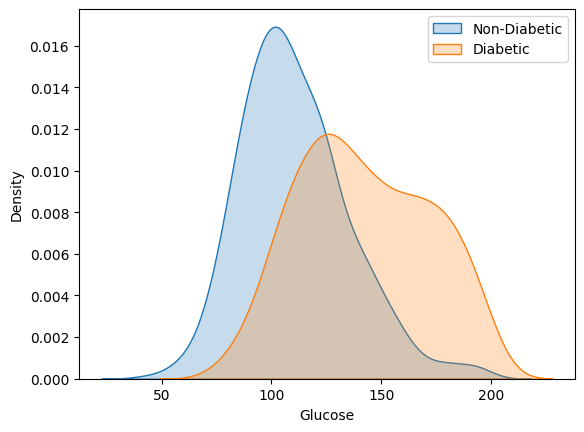

In [18]:
sns.kdeplot(df[df["Outcome"] == 0]["Glucose"], label="Non-Diabetic", shade=True)
sns.kdeplot(df[df["Outcome"] == 1]["Glucose"], label="Diabetic", shade=True)
plt.legend()
plt.show()

<Axes: >

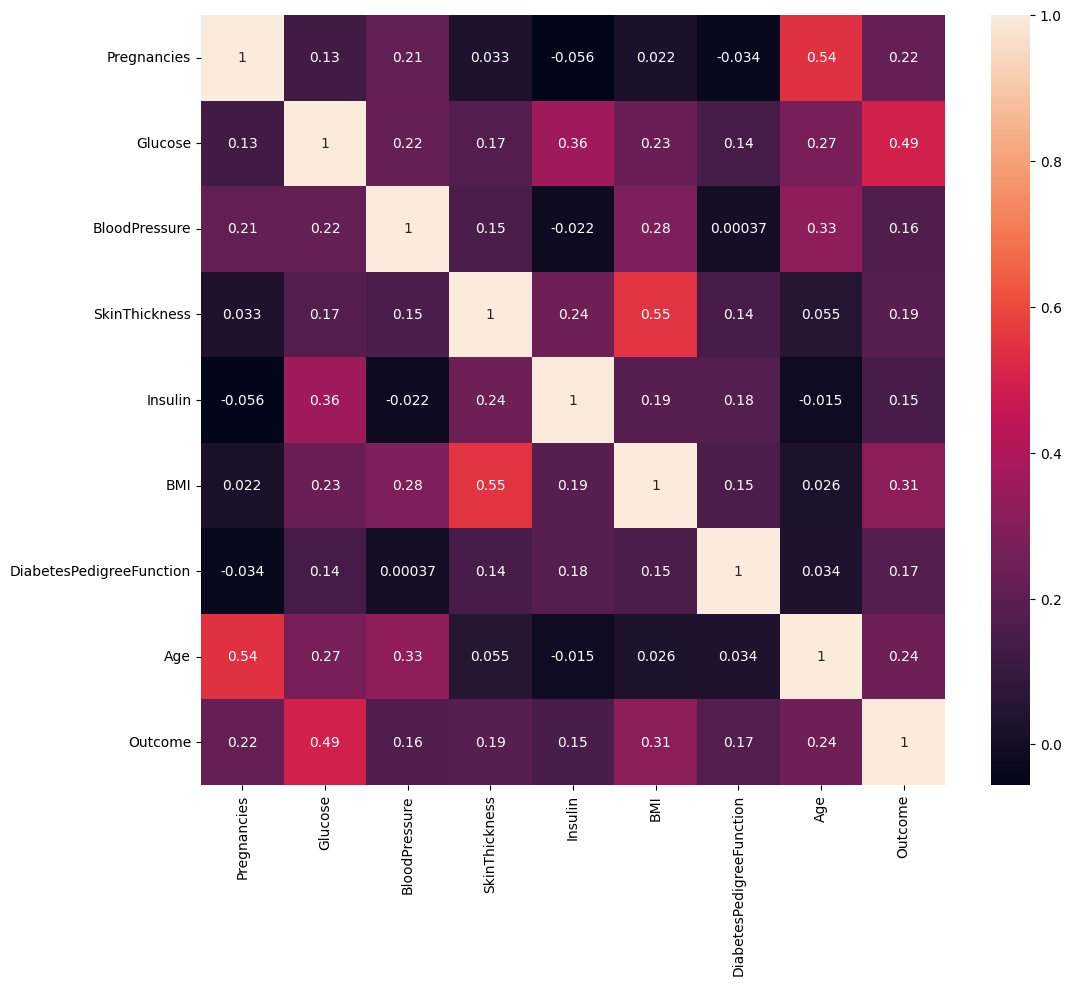

In [19]:
plt.figure(figsize=(12,10))  
sns.heatmap(df.corr(), annot=True )

In [20]:
#feature scaling with the use of standardscaler

In [21]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(df.drop(columns=["Outcome"])), columns=df.columns[:-1])

In [22]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.831114,0.695378,1.549885,5.484909,-0.020496


In [23]:
y = df['Outcome']

In [24]:
#splitting data into train and test sets

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [26]:
X_train.shape,X_test.shape

((614, 8), (154, 8))

In [27]:
#Logistic Regression Model Evaluation

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Predictions
y_train_pred = log_reg.predict(X_train)  # Predictions on training set
y_test_pred = log_reg.predict(X_test)    # Predictions on test set

In [30]:
# Accuracy Scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Train Set Accuracy:", train_acc * 100)
print("Test Set Accuracy:", test_acc * 100)

Train Set Accuracy: 79.47882736156352
Test Set Accuracy: 70.77922077922078


In [31]:
# Confusion Matrix & Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
 [[82 18]
 [27 27]]


In [32]:
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [33]:
#Random Forest Model with Hyperparameter Tuning

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [35]:
# hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200 , 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [36]:
# Perform Grid Search with cross-validation
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [37]:
# Get best model
print("Best Params:", grid.best_params_)
rfc = grid.best_estimator_

Best Params: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 50}


In [38]:
# Predictions
y_train_pred = rfc.predict(X_train)  # Train set predictions
y_test_pred = rfc.predict(X_test)    # Test set predictions

In [39]:
# Accuracy Scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Set Accuracy:", train_acc * 100)
print("Test Set Accuracy:", test_acc * 100)


Train Set Accuracy: 100.0
Test Set Accuracy: 74.02597402597402


In [40]:
# Confusion Matrix & Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
 [[82 18]
 [22 32]]


In [41]:
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       100
           1       0.64      0.59      0.62        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



In [42]:
# SHAP Values for Feature Importance

In [43]:
"""The SHAP summary plot helps you understand how each feature in your dataset 
influences the predictions made by your RandomForestClassifier."""

'The SHAP summary plot helps you understand how each feature in your dataset \ninfluences the predictions made by your RandomForestClassifier.'

<Figure size 640x480 with 0 Axes>

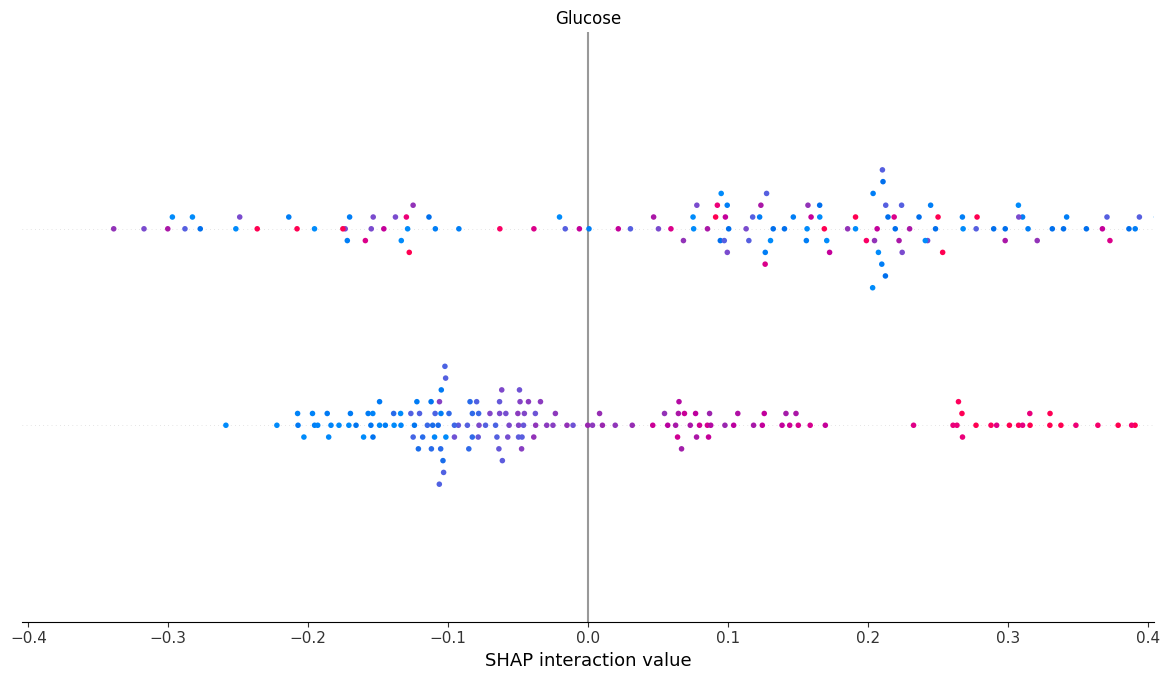

In [48]:
import shap

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [49]:
#saving model & scaler with pickle

In [50]:
import pickle
pickle.dump(rfc, open('model.pkl' , 'wb'))
pickle.dump(ss, open('scaling.pkl' , 'wb'))